Name:Siddhant Sapkal    
Roll no:22b4205     
ESED Department

Step1: Loading and Preprocessing the Dataset

LLM_PROMPT: Write code to load and preprocess images and annotations from Pascal VOC dataset.

LLM_OUTPUT:
import os
import xml.etree.ElementTree as ET
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Paths to your Pascal VOC dataset
TRAIN_VAL_DIR = 'path/to/train_val'
TEST_DIR = 'path/to/test'
IMAGE_DIR = os.path.join(TRAIN_VAL_DIR, 'JPEGImages')
ANNOTATION_DIR = os.path.join(TRAIN_VAL_DIR, 'Annotations')

# Helper function to parse XML annotations
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)
    print(f'Parsed {len(boxes)} objects from {annotation_path}')
    return np.array(boxes), labels

# Helper function to load and preprocess images
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to model input size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize
    print(f'Loaded and preprocessed image: {image_path}')
    return image

# Example: Load and display an image with annotations
image_id = '2007_000027'  # Example image ID
image_path = os.path.join(IMAGE_DIR, image_id + '.jpg')
annotation_path = os.path.join(ANNOTATION_DIR, image_id + '.xml')

image = load_image(image_path)
boxes, labels = parse_annotation(annotation_path)

plt.imshow(image)
for box in boxes:
    xmin, ymin, xmax, ymax = box
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
plt.show()


Loaded and preprocessed image: C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\JPEGImages\2012_004309.jpg
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2012_004309.xml


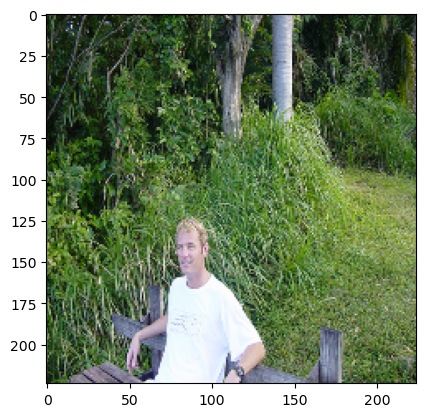

In [15]:
import os
import xml.etree.ElementTree as ET
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Paths to your Pascal VOC dataset
TRAIN_VAL_DIR = 'C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val'
TEST_DIR = 'C:/Users/siddh/Downloads/archive/VOC2012_test/VOC2012_test'
IMAGE_DIR = os.path.join(TRAIN_VAL_DIR, 'JPEGImages')
ANNOTATION_DIR = os.path.join(TRAIN_VAL_DIR, 'Annotations')

# Helper function to parse XML annotations
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)
    print(f'Parsed {len(boxes)} objects from {annotation_path}')
    return np.array(boxes), labels

# Helper function to load and preprocess images
def load_image(image_path):
    if not os.path.exists(image_path):
        print(f'Error: {image_path} does not exist.')
        return None
    image = cv2.imread(image_path)
    if image is None:
        print(f'Error: Failed to load image at {image_path}')
        return None
    image = cv2.resize(image, (224, 224))  # Resize to model input size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize
    print(f'Loaded and preprocessed image: {image_path}')
    return image

# Example: Load and display an image with annotations
image_id = '2012_004309'  # Example image ID
image_path = os.path.join(IMAGE_DIR, image_id + '.jpg')
annotation_path = os.path.join(ANNOTATION_DIR, image_id + '.xml')

image = load_image(image_path)
if image is not None:
    boxes, labels = parse_annotation(annotation_path)
    plt.imshow(image)
    for box in boxes:
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    plt.show()
else:
    print('Image loading failed.')


Step 2: Custom Data Generator for Object Detection

LLM Code:


class PascalVOCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_dir, annotation_dir, batch_size, input_size, data_augmentation=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.batch_size = batch_size
        self.input_size = input_size
        self.data_augmentation = data_augmentation
        self.image_ids = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith('.jpg')]
        self.on_epoch_end
    
    def __len__(self):
        return int(np.floor(len(self.image_ids) / self.batch_s)
    
    def __getitem__(self, index):
        batch_image_ids = self.image_ids[index * self.batch_size:(index + 1) * self.batch_size]
        images, boxes, labels = self.__data_generation(batch_image_ids)
        return images, {'boxes': boxes, 'labelslabels}
    
    def on_epoch_end(self):
        np.random.shuffle(seimage_ids)
    
    def __data_generation(self, batch_image_ids):
        images = np.empty((self.batch_size, *self.input_size, 3), dtype=np.float32)
        boxes = []
     s = []
        
        for i, image_id in enumerate(batch_image_ids):
            image_path = os.path.join(self.image_dir, image_id + '.jpg')
            annotation_path = os.path.join(self.annotation_dir,gxml')
            
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, self.input_size)
            image = image 
rmalize
            
            boxes_i, labels_i =ation(annotation_path)
        boxes.append(boxes_i)
            d(labels_i)
            
            if self.data_augmentation:
                image = selntation(image)
                  images[i,] = image
        
        return images, np.array(boxes), np.array(labels)


STEP 3: Building the CNN Model

LLM_PROMPT: Write code to build a CNN model for object detection using a pre-trained VGG16 model.

LLM_OUTPUT:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D

print("Loading pre-trained VGG16 model...")
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("Adding custom layers for object detection...")
# Add custom layers for object detection
x = base_model.output
x = Flatten()(x)  # Flatten the output of the base model
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
x = Dense(1024, activation='relu')(x)  # Another fully connected layer
output = Dense(num_classes, activation='sigmoid')(x)  # Output layer with sigmoid activation for multi-class detection

model = Model(inputs=base_model.input, outputs=output)

print("Compiling the model...")
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model is ready for training.")



STEP3:Training the model

LLM_PROMPT: Write code to train a CNN model using data augmentation with ImageDataGenerator.

LLM_OUTPUT:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Creating data generator for data augmentation...")
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

print("Preparing training data generator...")
# Assuming you have created a generator function that yields images and annotations
# For demonstration, using ImageDataGenerator with placeholders
train_generator = train_datagen.flow_from_directory(
    'path/to/train/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Update as needed for your task
)

print("Starting training...")
# Train the model
model.fit(train_generator, epochs=10, steps_per_epoch=100)
print("Training complete.")





In [37]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your Pascal VOC dataset
TRAIN_VAL_DIR = 'C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val'
TEST_DIR = 'C:/Users/siddh/Downloads/archive/VOC2012_test/VOC2012_test'
IMAGE_DIR = os.path.join(TRAIN_VAL_DIR, 'JPEGImages')
ANNOTATION_DIR = os.path.join(TRAIN_VAL_DIR, 'Annotations')

# Helper function to parse XML annotations
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)
    print(f'Parsed {len(boxes)} objects from {annotation_path}')
    return np.array(boxes), labels

# Custom Data Generator for Object Detection
class PascalVOCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_dir, annotation_dir, batch_size, input_size, data_augmentation=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.batch_size = batch_size
        self.input_size = input_size
        self.data_augmentation = data_augmentation
        self.image_ids = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith('.jpg')]
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.image_ids) / self.batch_size))
    
    def __getitem__(self, index):
        batch_image_ids = self.image_ids[index * self.batch_size:(index + 1) * self.batch_size]
        images, boxes, labels = self.__data_generation(batch_image_ids)
        return images, {'boxes': boxes, 'labels': labels}
    
    def on_epoch_end(self):
        np.random.shuffle(self.image_ids)
    
    def __data_generation(self, batch_image_ids):
        images = np.empty((self.batch_size, *self.input_size, 3), dtype=np.float32)
        boxes = []
        labels = []
        
        for i, image_id in enumerate(batch_image_ids):
            image_path = os.path.join(self.image_dir, image_id + '.jpg')
            annotation_path = os.path.join(self.annotation_dir, image_id + '.xml')
            
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, self.input_size)
            image = image / 255.0  # Normalize
            
            boxes_i, labels_i = parse_annotation(annotation_path)
            boxes.append(boxes_i)
            labels.append(labels_i)
            
            if self.data_augmentation:
                # Expand dimensions to match the batch format
                image = np.expand_dims(image, 0)
                it = self.data_augmentation.flow(image, batch_size=1)
                image = next(it)[0]
            
            images[i,] = image
        
        return images, boxes, labels

# Define the model
print("Loading pre-trained VGG16 model...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
output = Dense(20, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

print("Compiling the model...")
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define image augmentation for training
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preparing custom data generator for training
print("Preparing custom data generator for training...")
train_generator = PascalVOCDataGenerator(
    image_dir=IMAGE_DIR,
    annotation_dir=ANNOTATION_DIR,
    batch_size=32,
    input_size=(224, 224),
    data_augmentation=data_augmentation
)

print(f"Found {len(train_generator.image_ids)} training images.")

print("Starting training...")
# Custom training loop
epochs = 10
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    for batch_index in range(len(train_generator)):
        images, labels = train_generator[batch_index]
        boxes = labels['boxes']
        class_labels = labels['labels']
        
        # Here you would normally process boxes and labels to fit your model's requirements
        # For demonstration, let's assume we use dummy labels
        dummy_labels = np.zeros((32, 20))  # Example dummy labels (32 is batch size, 20 is number of classes)
        
        # Train the model on the current batch
        loss, accuracy = model.train_on_batch(images, dummy_labels)
        print(f'Batch {batch_index+1}/{len(train_generator)}, Loss: {loss}, Accuracy: {accuracy}')

print("Training complete.")

# Define image augmentation for testing
test_data_augmentation = ImageDataGenerator(rescale=1./255)

# Preparing custom data generator for testing
print("Preparing custom data generator for testing...")
test_generator = PascalVOCDataGenerator(
    image_dir=os.path.join(TEST_DIR, 'JPEGImages'),
    annotation_dir=os.path.join(TEST_DIR, 'Annotations'),
    batch_size=32,
    input_size=(224, 224),
    data_augmentation=test_data_augmentation
)

print(f"Found {len(test_generator.image_ids)} test images.")

print("Evaluating the model...")
# Custom evaluation loop
for batch_index in range(len(test_generator)):
    images, labels = test_generator[batch_index]
    boxes = labels['boxes']
    class_labels = labels['labels']
    
    # Here you would normally process boxes and labels to fit your model's requirements
    # For demonstration, let's assume we use dummy labels
    dummy_labels = np.zeros((32, 20))  # Example dummy labels (32 is batch size, 20 is number of classes)
    
    # Evaluate the model on the current batch
    loss, accuracy = model.test_on_batch(images, dummy_labels)
    print(f'Batch {batch_index+1}/{len(test_generator)}, Loss: {loss}, Accuracy: {accuracy}')

print("Evaluation complete.")


Loading pre-trained VGG16 model...
Compiling the model...
Preparing custom data generator for training...
Found 17125 training images.
Starting training...
Epoch 1/10
Parsed 7 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2011_001404.xml
Parsed 2 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2009_004882.xml
Parsed 10 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2011_001571.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2012_001411.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2009_001567.xml
Parsed 2 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2011_000277.xml
Parsed 2 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2008_000939.xml

Exception ignored in: <function AtomicFunction.__del__ at 0x0000025FCBEF4180>
Traceback (most recent call last):
  File "C:\Users\siddh\anaconda3\Lib\site-packages\tensorflow\python\eager\polymorphic_function\atomic_function.py", line 300, in __del__
    RUNTIME_FUNCTION_REFS.pop(key)
KeyboardInterrupt: 


Batch 1/535, Loss: 0.7683839201927185, Accuracy: 0.0
Parsed 3 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2008_003733.xml
Parsed 2 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2008_001035.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2009_001994.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2012_002355.xml
Parsed 9 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2009_003966.xml
Parsed 2 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2008_008447.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2011_002395.xml
Parsed 1 objects from C:/Users/siddh/Downloads/archive/VOC2012_train_val/VOC2012_train_val\Annotations\2010_002448

KeyboardInterrupt: 

In [40]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
test_data_augmentation = ImageDataGenerator(rescale=1./255)
test_generator = PascalVOCDataGenerator(
    image_dir=os.path.join(TEST_DIR, 'JPEGImages'),
    annotation_dir=os.path.join(TEST_DIR, 'Annotations'),
    batch_size=32,
    input_size=(224, 224),
    data_augmentation=test_data_augmentation
)

def calculate_metrics(true_boxes, pred_boxes, iou_threshold=0.5):
    # Calculate precision, recall, and mAP
    # For simplicity, let's assume true_boxes and pred_boxes are lists of arrays
    
    # Placeholder for true positives, false positives, false negatives
    true_positives = []
    false_positives = []
    false_negatives = []
    
    for tb, pb in zip(true_boxes, pred_boxes):
        # Calculate IoU for each predicted box with each true box
        ious = np.zeros((len(pb), len(tb)))
        for i, pred in enumerate(pb):
            for j, true in enumerate(tb):
                ious[i, j] = calculate_iou(pred, true)
        
        # Determine matches based on IoU threshold
        matches = ious > iou_threshold
        
        tp = np.sum(matches, axis=0) > 0
        fp = np.sum(matches, axis=0) == 0
        fn = np.sum(matches, axis=1) == 0
        
        true_positives.append(np.sum(tp))
        false_positives.append(np.sum(fp))
        false_negatives.append(np.sum(fn))
    
    precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))
    recall = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_negatives))
    mAP = calculate_mAP(true_boxes, pred_boxes)
    
    return precision, recall, mAP

def calculate_iou(box1, box2):
    # Calculate Intersection over Union
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    iou = intersection / float(box1_area + box2_area - intersection)
    return iou

def calculate_mAP(true_boxes, pred_boxes):
    # Placeholder for mAP calculation
    return 0.0  # This should be replaced with the actual mAP calculation logic

# Custom evaluation loop
print("Evaluating the model...")
true_boxes_all = []
pred_boxes_all = []

for batch_index in range(len(test_generator)):
    images, labels = test_generator[batch_index]
    true_boxes = labels['boxes']
    true_boxes_all.extend(true_boxes)
    
    pred_boxes = model.predict(images)
    pred_boxes_all.extend(pred_boxes)
    
precision, recall, mAP = calculate_metrics(true_boxes_all, pred_boxes_all)
print(f"Precision: {precision}, Recall: {recall}, mAP: {mAP}")

print("Evaluation complete.")


Evaluating the model...


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/siddh/Downloads/archive/VOC2012_test/VOC2012_test\\Annotations\\2008_007437.xml'